# **Aprendizaje supervisado**
# SL14. Curvas de análisis para modelos de clasificación


In [ ]:
import pandas as pd
import numpy as np
import scipy

import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <font color='blue'>**Modelo de Predicción de Supervivientes en Titanic.**</font>

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Gonzalo/CD-P2 APRENDIZAJE SUPERVISADO/CLASE 7/titanic.csv', index_col = 0)
df[['Pclass', 'Sex','Embarked']] = df[['Pclass', 'Sex','Embarked']].astype('category')
df['Age'] = df.Age.fillna(df.Age.mean())
df.dtypes

,0
Survived,int64
Pclass,category
Name,object
Sex,category
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [ ]:
X = df[['Pclass', 'Sex','Age','Parch','Fare','Embarked']]
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [ ]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.2 MB/s eta 0:00:00


In [ ]:
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
ohe = OneHotEncoder(use_cat_names = True)
X_train_enc = ohe.fit_transform(X_train)
X_test_enc = ohe.transform(X_test)

In [ ]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train_enc)
X_test_sc = sc.transform(X_test_enc)

In [ ]:
lr = LogisticRegression(random_state = 123)
lr.fit(X_train_sc, y_train)
y_pred = lr.predict(X_test_sc)
y_pred_train = lr.predict(X_test_sc)
y_proba = lr.predict_proba(X_test_sc)

print('Score Train:', lr.score(X_train_sc, y_train))
print('Score Test:', lr.score(X_test_sc, y_test))

Score Train: 0.8009630818619583
Score Test: 0.8022388059701493


In [ ]:
lr.coef_

array([[ 0.04508866,  0.54084199, -0.49906824,  0.60993405, -0.60993405,
        -0.5209633 , -0.11857968,  0.02353197, -0.11444419,  0.06620614,
         0.05133653,  0.19151959]])

In [ ]:
lr.intercept_

array([-0.58371354])

In [ ]:
pip install --upgrade scikit-plot

In [ ]:
# Crear un alias para scipy.interp que apunte a numpy.interp
scipy.interp = np.interp

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scikitplot.metrics import plot_confusion_matrix, plot_roc, plot_cumulative_gain, plot_precision_recall, plot_lift_curve

In [ ]:
confusion_matrix(y_test, y_pred)

array([[145,  25],
       [ 28,  70]])

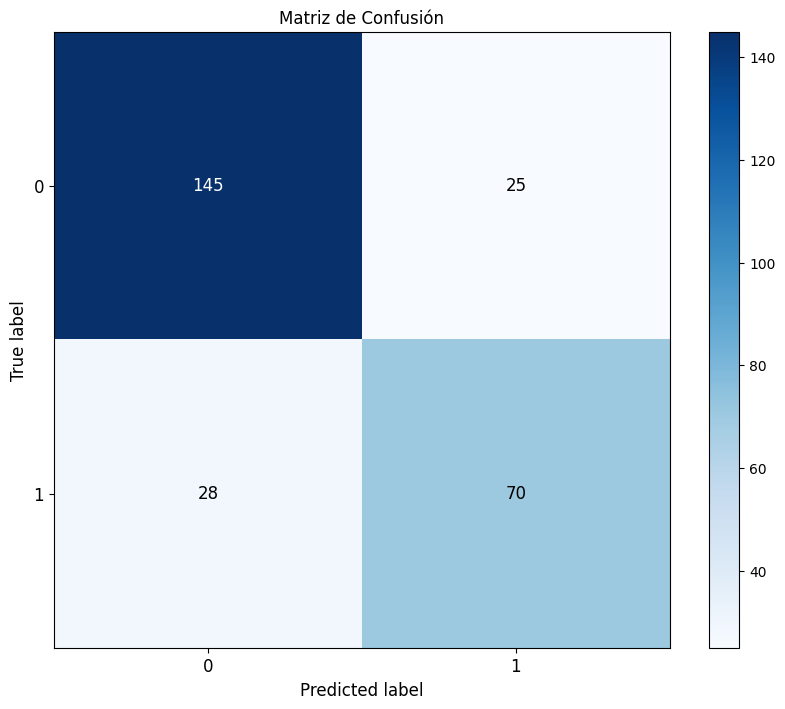

In [ ]:
plot_confusion_matrix(y_test, y_pred, title = 'Matriz de Confusión',text_fontsize = 'large', title_fontsize = 'large', figsize = (10,8))
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.8382    0.8529    0.8455       170
           1     0.7368    0.7143    0.7254        98

    accuracy                         0.8022       268
   macro avg     0.7875    0.7836    0.7854       268
weighted avg     0.8011    0.8022    0.8016       268



## <font color='blue'>**¿Cómo Elegir el Mejor Modelo?**</font>

## Curva Precision-Recall

Esta curva presenta el trade-off Precision-Recall de todos los puntos de corte. De esa manera se puede escoger el punto de corte que optimice la métrica que se quiere escoger o utilizar el área bajo la curva como una métrica de medida.

<img src='https://drive.google.com/uc?export=view&id=1ZHKnkQ5Hm-y2dnvqW2mYbAu1L-7-AH0o' width="600" align="center" style="margin-right: 20px">

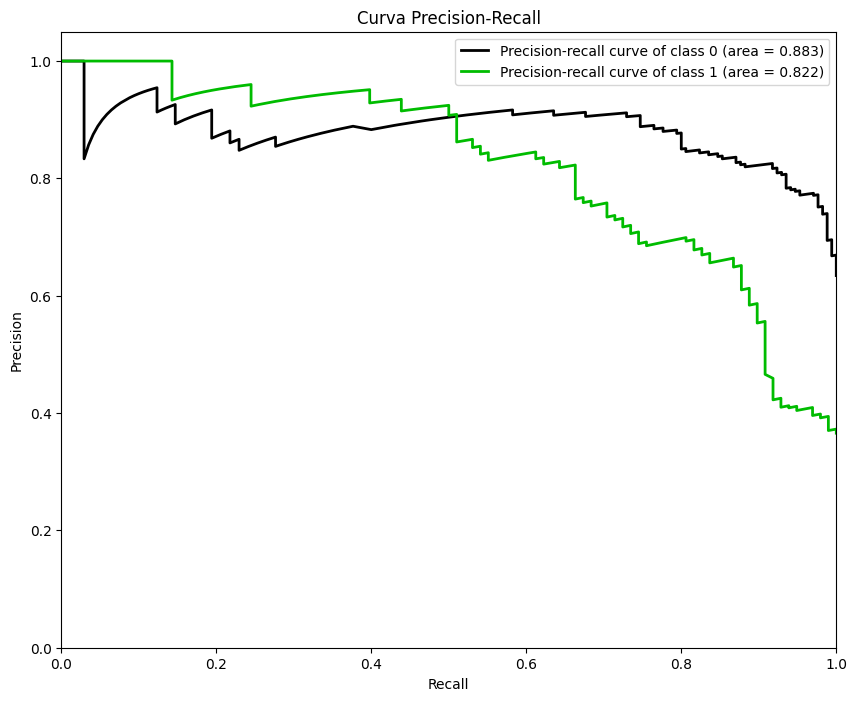

In [ ]:
plot_precision_recall(y_test, y_proba, title = 'Curva Precision-Recall', plot_micro = False, classes_to_plot = [0,1], figsize = (10,8))
plt.show()

In [ ]:
y.value_counts() #Debido a que Titanic es un dataset relativamente desbalanceado, podría ser una métrica más honesta

,count
Survived,
0,549
1,342


La utilización de esta curva es particularmente útil cuando se trabaja con clases desbalanceadas. Normalmente se utiliza el área bajo la curva (AUC) como una medida, donde 1 representa un modelo perfecto.

## Curva Receiver Operating Characteristic - ROC

Esta curva representa el trade-off entre el recall (también llamado sensibilidad) y 1 - Especifidad, donde la Especifidad representa el Recall de la otra clase (para problemas binarios). Al igual que la curva representa este trade-off para todos los puntos de corte posible.

Adicionalmente existe una interpretación alternativa, en la cual la curva ROC representa la probabilidad de que un punto de la clase positiva tenga una mayor probabilidad que un punto de la clase negativa. Es decir, la probabilidad de que el modelo pueda ordenar las predicciones correctamente por probabilidad.

<img src='https://drive.google.com/uc?export=view&id=1He2TUyM75fd6ja-aSQq3nB04Y5FV6FEN' width="600" align="center" style="margin-right: 20px">

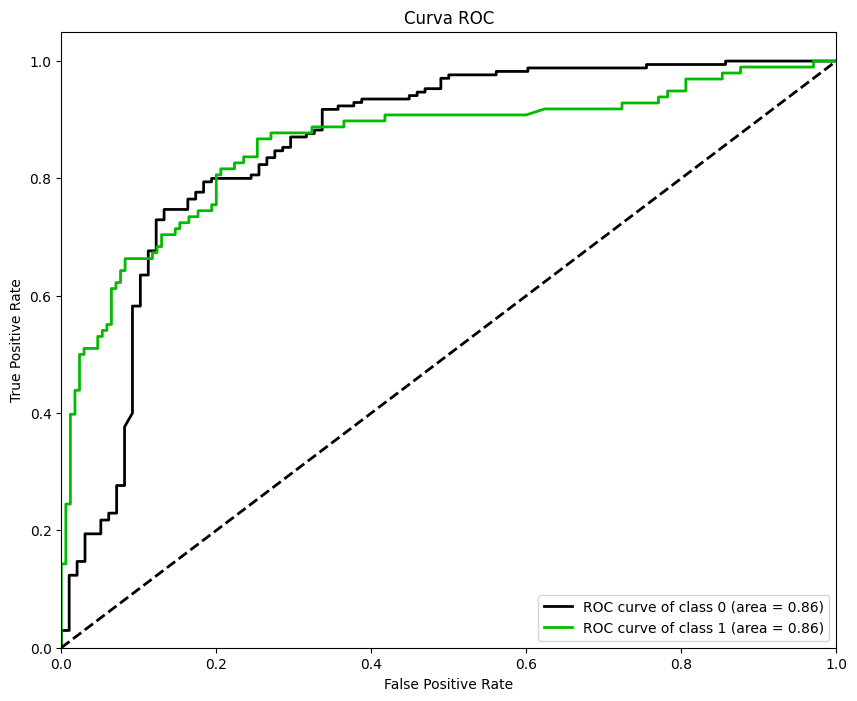

In [ ]:
plot_roc(y_test, y_proba, plot_micro = False, plot_macro = False, title = 'Curva ROC', figsize = (10,8))
plt.show()

## Curva Ganancia

La curva de Ganancia corresponde a una curva que mide qué porcentaje de la data es necesario para encontrar un cierto porcentaje de la clase requerida.

<img src='https://drive.google.com/uc?export=view&id=1ktbS930bK68Pb6t5Qw3HF1M0K8Am672C' width="600" align="center" style="margin-right: 20px">

Esta métrica suele ser una métrica muy importante en marketing en donde se puede garantizar un cierto porcentaje de acierto si es que se contacta una cierta muestra con mayor probabilidad de la población a predecir.

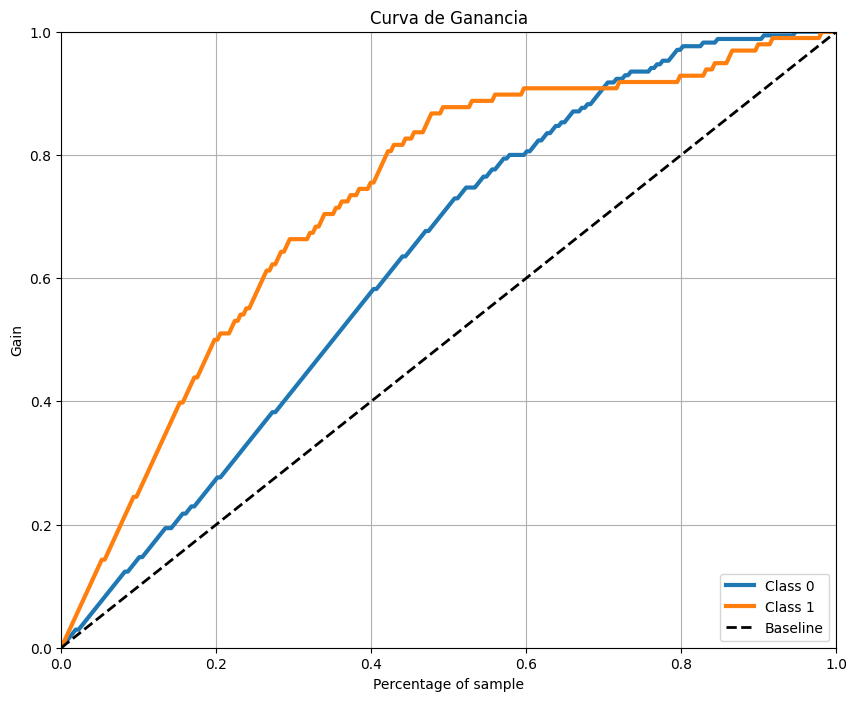

In [ ]:
plot_cumulative_gain(y_test, y_proba, title = 'Curva de Ganancia', figsize = (10,8))
plt.show()

# <font color='purple' style='bold' size=5>**EXPERIMENTO** </font>

**Comparación entre Modelos:**

**Regresión Logística vs. Naive Bayes**

Una opción es entrenar otro modelo (por ejemplo, GaussianNB) sobre los mismos datos preprocesados y comparar sus métricas y curvas ROC con la Regresión Logística. Esto permitirá ver si el desempeño es similar o si uno de ellos se comporta mejor para el problema de supervivencia del Titanic.

GaussianNB - Score Test: 0.6529850746268657
Reporte de clasificación:
               precision    recall  f1-score   support

           0     0.6486    0.9882    0.7832       170
           1     0.7778    0.0714    0.1308        98

    accuracy                         0.6530       268
   macro avg     0.7132    0.5298    0.4570       268
weighted avg     0.6959    0.6530    0.5447       268



<Figure size 1200x800 with 0 Axes>

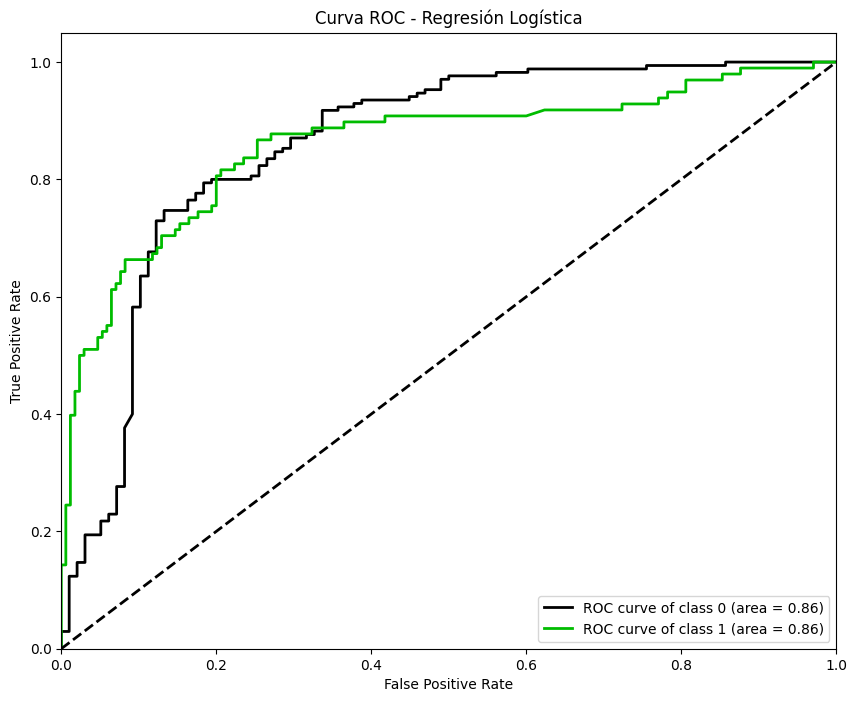

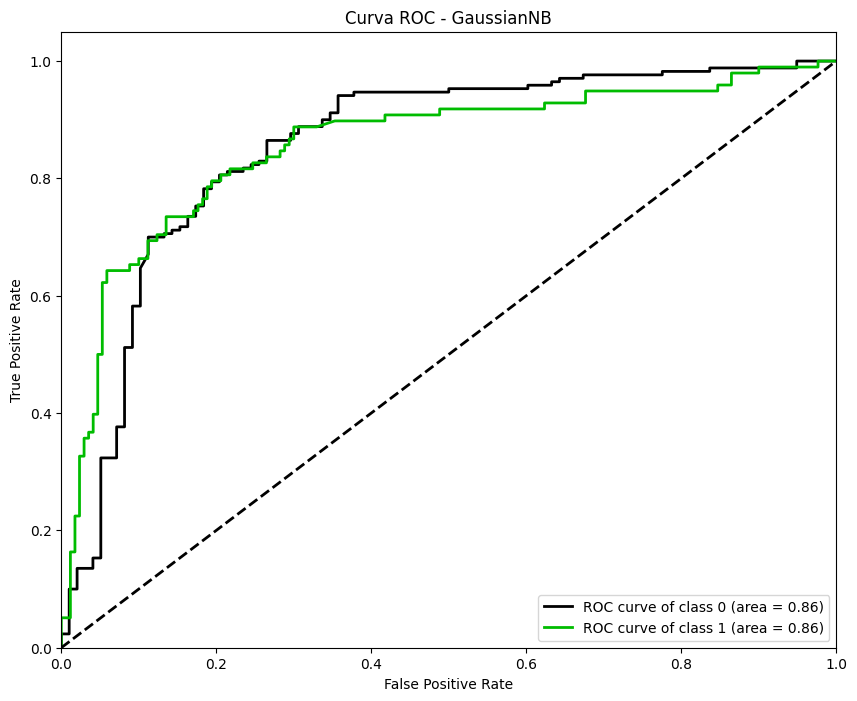

In [ ]:
# Importar el clasificador GaussianNB (ya importado en tu código, pero se muestra para claridad)
from sklearn.naive_bayes import GaussianNB

# Entrenar el modelo de GaussianNB con los datos escalados (X_train_sc y X_test_sc)
gnb = GaussianNB()
gnb.fit(X_train_sc, y_train)

# Predecir y obtener probabilidades para el conjunto de prueba
y_pred_gnb = gnb.predict(X_test_sc)
y_proba_gnb = gnb.predict_proba(X_test_sc)

# Mostrar algunas métricas para GaussianNB
print("GaussianNB - Score Test:", gnb.score(X_test_sc, y_test))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_gnb, digits=4))

# Comparar las curvas ROC de ambos modelos
plt.figure(figsize=(12,8))
# Curva ROC para Regresión Logística
plot_roc(y_test, y_proba, plot_micro=False, plot_macro=False, title="Curva ROC - Regresión Logística", figsize=(10,8))
# Curva ROC para GaussianNB
plot_roc(y_test, y_proba_gnb, plot_micro=False, plot_macro=False, title="Curva ROC - GaussianNB", figsize=(10,8))
plt.show()


**Visualización de la Learning Curve (Curva de Aprendizaje)**

Otra opción es analizar la learning curve del modelo (Regresión Logística) para observar cómo varían las métricas de entrenamiento y validación conforme aumenta el número de muestras de entrenamiento. Esto da información sobre la presencia de sobreajuste (overfitting) o subajuste (underfitting).

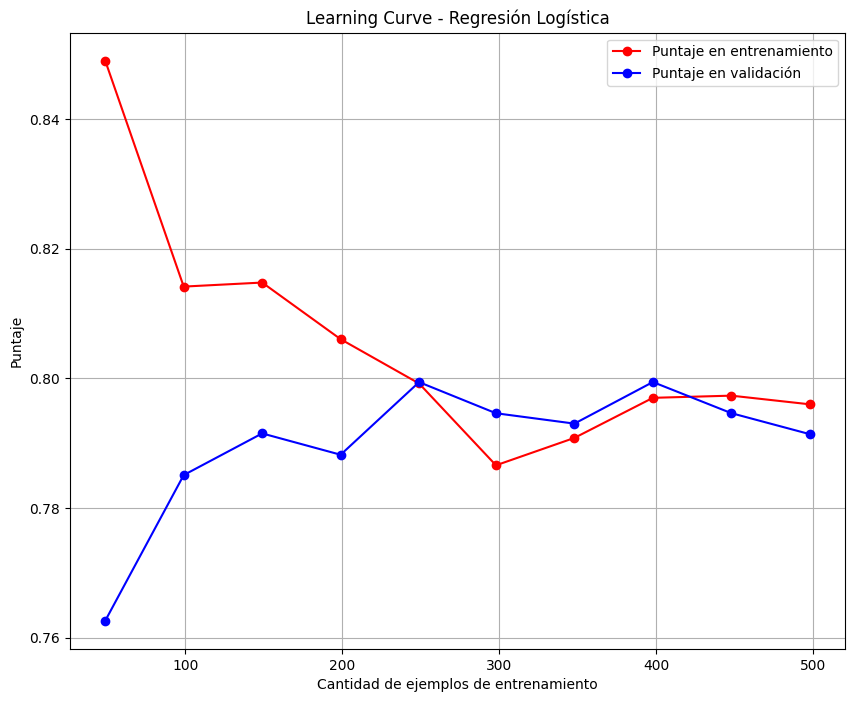

In [ ]:
from sklearn.model_selection import learning_curve

# Definir rangos de tamaño de muestra para construir la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    lr, X_train_sc, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1, random_state=123
)

# Calcular los promedios a lo largo de las particiones para entrenamiento y validación
mean_train_scores = np.mean(train_scores, axis=1)
mean_test_scores = np.mean(test_scores, axis=1)

plt.figure(figsize=(10,8))
plt.plot(train_sizes, mean_train_scores, 'o-', color='r', label='Puntaje en entrenamiento')
plt.plot(train_sizes, mean_test_scores, 'o-', color='b', label='Puntaje en validación')
plt.title("Learning Curve - Regresión Logística")
plt.xlabel("Cantidad de ejemplos de entrenamiento")
plt.ylabel("Puntaje")
plt.legend(loc="best")
plt.grid(True)
plt.show()


# <font color='purple' style='bold' size=5>**FIN EXPERIMENTO** </font>

# <font color='purple' style='bold' size=5>**MATERIAL ADICIONAL** </font>

**Curva de Calibración (Calibration Curve)**

La calibración de un modelo es fundamental cuando se requieren estimaciones de probabilidad bien calibradas. En este material adicional se utiliza la función calibration_curve para comparar las probabilidades predichas con la fracción de positivos reales.

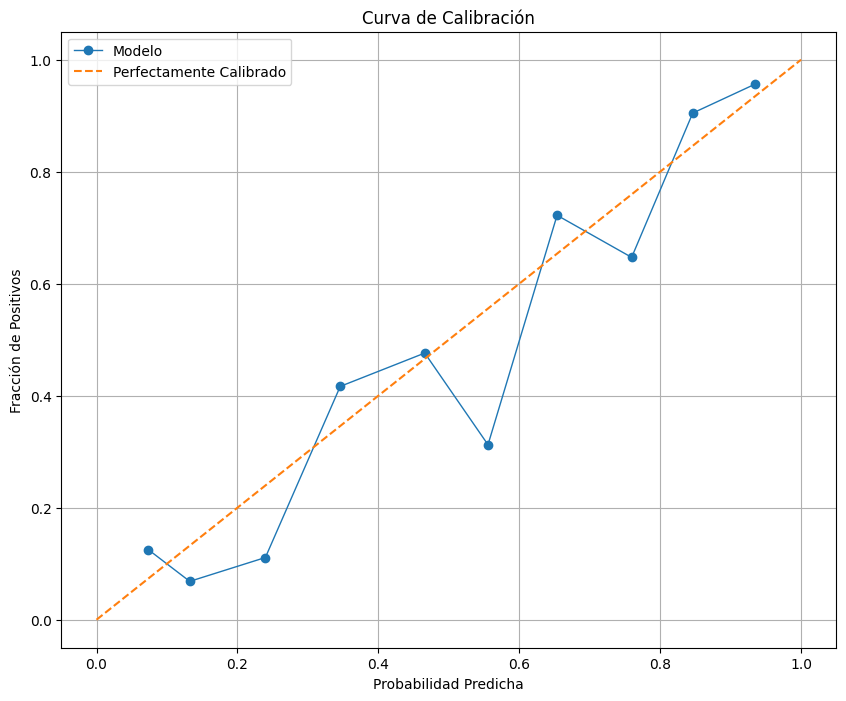

In [ ]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# Suponiendo que y_test y y_proba (salida de predict_proba) están ya definidos

# Calcular la curva de calibración (solo para la probabilidad de la clase positiva)
prob_true, prob_pred = calibration_curve(y_test, y_proba[:, 1], n_bins=10)

# Graficar la curva de calibración
plt.figure(figsize=(10, 8))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Modelo')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectamente Calibrado')
plt.xlabel("Probabilidad Predicha")
plt.ylabel("Fracción de Positivos")
plt.title("Curva de Calibración")
plt.legend(loc="best")
plt.grid(True)
plt.show()


# <font color='purple' style='bold' size=5>**FIN MATERIAL ADICIONAL** </font>

# <font color='purple' style='bold' size=5>**REFLEXION GRUPAL** </font>

Durante este módulo, hemos profundizado en el aprendizaje supervisado, una de las ramas más fundamentales del machine learning, en la que se utilizan datos previamente etiquetados para entrenar modelos capaces de predecir o clasificar nuevos datos. Cada sesión del curso nos permitió explorar desde las bases teóricas hasta ejercicios prácticos avanzados que integran técnicas clásicas y modernas, reforzando nuestra capacidad para crear modelos precisos y robustos.

**1. Fundamentos y Primeros Pasos**

En las primeras clases nos introdujimos en el mundo del aprendizaje supervisado a través de ejemplos básicos y ejercicios prácticos. Analizamos la importancia de comprender la naturaleza y estructura de los datos, así como la relevancia del preprocesamiento para garantizar que nuestros modelos aprendan correctamente. La presentación introductoria y los archivos adjuntos de la Clase 1 nos ofrecieron una visión panorámica, donde se explicó el proceso completo: desde la obtención de datos hasta la evaluación de resultados.

**2. Modelos de Regresión y Análisis de Bias-Variance**

La Clase 2 se centró en la regresión lineal y el análisis de la problemática bias-variance.

En el ejercicio de regresión lineal aprendimos a modelar relaciones continuas, detectando patrones y ajustando parámetros para minimizar el error.

El estudio del trade-off entre sesgo y varianza nos ayudó a entender cómo balancear la complejidad del modelo para evitar el sobreajuste (overfitting) o el subajuste (underfitting).

Estos conceptos resultan esenciales para garantizar que nuestros modelos sean generalizables a nuevos datos, permitiendo una mejor toma de decisiones en entornos reales.

**3. Técnicas de Clasificación**

Posteriormente, en la Clase 3, nos adentramos en técnicas de clasificación con algoritmos como la regresión logística y el método Naive Bayes.

La regresión logística se presentó como una herramienta poderosa para estimar probabilidades y clasificar ejemplos en categorías binomiales, lo que es especialmente útil en aplicaciones como la detección de spam, diagnóstico médico y análisis de comportamiento.

Por otro lado, Naive Bayes nos mostró la efectividad de aplicar el teorema de Bayes asumiendo independencia entre variables, permitiendo clasificaciones rápidas y eficientes en grandes conjuntos de datos.

**4. Algoritmos Basados en Instancias y Máquinas de Soporte Vectorial**

En la Clase 4 se exploraron dos técnicas complementarias:

K-Nearest Neighbors (KNN): Esta metodología nos permitió clasificar nuevos casos basándonos en la similitud con ejemplos previamente observados, facilitando la identificación de patrones locales en los datos.

Máquinas de Soporte Vectorial (SVM): Con SVM, aprendimos a definir hiperplanos óptimos que separan clases en espacios de alta dimensión, destacando la robustez de este algoritmo en problemas de clasificación complejos.

**5. Ensamblaje de Modelos y Técnicas Avanzadas**

El módulo continuó con la aplicación de métodos de ensamblaje, que resultan cruciales para mejorar la precisión y estabilidad de nuestras predicciones:

En Clase 5, el ejercicio con Random Forest nos permitió ver la potencia de combinar múltiples árboles de decisión, reduciendo la varianza y mejorando la robustez del modelo frente a datos ruidosos.

Posteriormente, en Clase 6 y 7, profundizamos en técnicas de Gradient Boosting y en la interpretación de curvas de análisis para modelos de clasificación, aprendiendo a ajustar hiperparámetros y a identificar el rendimiento óptimo en función de distintos criterios de evaluación.

**6. Aplicaciones Prácticas y Proyectos**

El Capstone Project y los ejercicios opcionales nos brindaron la oportunidad de integrar los conocimientos adquiridos en situaciones reales. Trabajamos con conjuntos de datos diversos, desde análisis de sentimientos y detección de correos spam hasta conjuntos de datos complejos como los registros de préstamos, rendimiento de estudiantes y datos del Titanic. Estas experiencias prácticas nos permitieron consolidar nuestra capacidad para:

Seleccionar y preparar las variables relevantes.

Evaluar el desempeño de distintos modelos.

Ajustar técnicas en función de los objetivos específicos de cada aplicación.

**Perspectivas y Aplicaciones Profesionales**

**Alejandro** comentó que en su entorno laboral, aunque aún no hemos implementado estas tecnologías, creo que el aprendizaje supervisado tiene el potencial de revolucionar nuestra industria al mejorar la precisión, reducir costos y aumentar la eficiencia en todos los niveles de nuestra cadena de valor.

**Fernanda** destacó que este módulo le entregó herramientas concretas para aplicar modelos supervisados en contextos reales de planta, como el desarrollo de soft-sensors, modelos de recomendación operacional o predicciones a futuro, los cuales son parte del trabajo que realiza su empresa. Señaló que no solo aprendió a entrenar modelos, sino también a validar su desempeño con distintas métricas y a analizar los errores, para asegurar que realmente sean útiles en terreno. Esto le permite comprender mejor el trabajo del área de datos, conversar en el mismo lenguaje y analizar los resultados con mayor criterio. Como project manager, considera que este conocimiento también le ayuda a traducir los análisis al cliente, explicar su valor en términos operacionales y tomar decisiones más informadas basadas en datos.

**Gonzalo**, por su parte, subrayó la importancia de estas técnicas para segmentar y clasificar grandes volúmenes de datos de estudiantes. Su enfoque ha permitido identificar patrones de rendimiento y diseñar estrategias de intervención educativa más efectivas.

**Rodrigo** indicó que, gracias al aprendizaje supervisado, su capacidad para analizar datos ha sido amplificada, permitiéndole desarrollar modelos predictivos que anticipan comportamientos y optimizan recursos en proyectos de analítica avanzada enfocados a la Salud Pública, generando una mejor distribución de los esfuerzos para mejorar la salud de la comunidad, con un enfoque más proactivo y menos reactivo.

**Conclusión**

El aprendizaje supervisado no solo nos ha proporcionado las herramientas técnicas necesarias para abordar problemas de clasificación y regresión, sino que también ha fortalecido nuestra capacidad analítica para transformar datos en decisiones informadas. A través del estudio y la práctica con técnicas como la regresión, clasificación, SVM, KNN, Random Forest y Gradient Boosting, hemos adquirido una comprensión profunda de cómo los modelos supervisados pueden adaptarse a diversas problemáticas y sectores. Este módulo nos ha preparado para enfrentar desafíos reales, integrando conceptos teóricos con prácticas que potencian el valor de nuestros análisis en contextos profesionales.

# <font color='purple' style='bold' size=5>**FIN REFLEXION GRUPAL** </font>